In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from skimage.transform import resize
import os
import pandas as pd
from skimage import color
from skimage import io
from sklearn.decomposition import PCA

In [2]:
data_exp_path = os.getcwd()
pca_path = os.path.abspath(os.path.join(data_exp_path, '../'))
repo_path = os.path.abspath(os.path.join(pca_path, '../'))
data_path = os.path.abspath(os.path.join(repo_path, '../data'))
augmented_dataset = os.path.abspath(os.path.join(data_path, 'AugmentedAlzheimerDataset'))
original_dataset = os.path.abspath(os.path.join(data_path, 'OriginalDataset'))

# Example of how this works on subset of data

In [ ]:
img = imread(original_dataset + '\\MildDemented\\' + os.listdir(original_dataset + '\\MildDemented')[0])
img = img.astype(np.uint8)
plt.imshow(img, cmap='gray')

In [ ]:
mild_demented_list = []
mild_demented_path = original_dataset + '\\MildDemented\\'

counter = 0
for image in os.listdir(mild_demented_path):
    image_path = mild_demented_path + image
    
    cur_image = plt.imread(image_path).flatten()
    
    mild_demented_list.append(cur_image)
    if counter % 250 == 0:
        print("Completed", counter)
    counter += 1
    
mild_demented_arr = np.array(mild_demented_list)

In [ ]:
mild_demented_arr.shape

In [ ]:
#mild_demented_arr[0].reshape(176, 208)
plt.imshow(mild_demented_arr[0].reshape(208, 176))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_80 = PCA(n_components = 0.9)

In [ ]:
pca_80.fit(mild_demented_arr)

In [ ]:
pca_80.components_[0].reshape(208, 176)

In [ ]:
plt.imshow(pca_80.components_[0].reshape(208, 176))

In [ ]:
eigenvalues = pca_80.explained_variance_

In [ ]:
len(eigenvalues)

In [ ]:
pca_80 = PCA(n_components=0.8)

In [ ]:
pca_80.fit(mild_demented_arr)

In [ ]:
test_path = 'C:\\Users\\12057\\OneDrive\\Desktop\\Vanderbilt Schoolwork\\Spring 2023\\Foundations of Machine Learning\\Project\\Code\data\\OriginalDataset\\MildDemented\\26 (19).jpg'
test_image = io.imread(test_path, as_gray=True)

In [ ]:
test_image.shape

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image[115][50]

# Combining what we now know... let's run it on the whole dataset!

In [3]:
dataset = []

classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

counter = 0
for subsection in classes:
    cur_path = original_dataset + '\\' + subsection + '\\'
    for image in os.listdir(cur_path):
        image_path = cur_path + image
        cur_image = plt.imread(image_path).flatten()
        dataset.append(cur_image)
        if counter % 1000 == 0:
            print("Completed", counter)
        counter += 1
            
dataset = np.array(dataset)

Completed 0
Completed 1000
Completed 2000
Completed 3000
Completed 4000
Completed 5000
Completed 6000


In [4]:
dataset.shape

(6400, 36608)

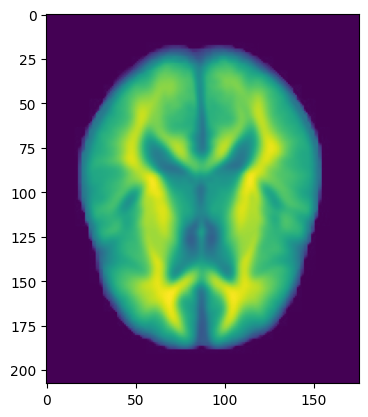

In [5]:
# We need to scale our datasaet
dataset_mean = np.mean(dataset, axis=0)  # mean of all images (column-wise)

# Let's visualize the mean image
plt.imshow(dataset_mean.reshape(208, 176))

Note that the above image matches what we previously found with PCA on unscaled data!

Now let's make sure that our assumption of all pixel values being between 0-255 is valid

In [6]:
overall_min = float('inf')
overall_max = -float('inf')

for image in dataset:
    max_of_image = image.max()
    min_of_image = image.min()
    overall_max = max_of_image if max_of_image > overall_max else overall_max
    overall_min = min_of_image if min_of_image < overall_min else overall_min

print("Overall min:", overall_min)
print("Overall max:", overall_max)

Overall min: 0
Overall max: 255


Since all values are between 0 and 255, we can just divide each pixel by 255 for scaling

In [7]:
scaled_dataset = np.zeros((6400, 36608))
for i in range(len(dataset)):
    scaled_dataset[i] = np.divide(dataset[i], 255)

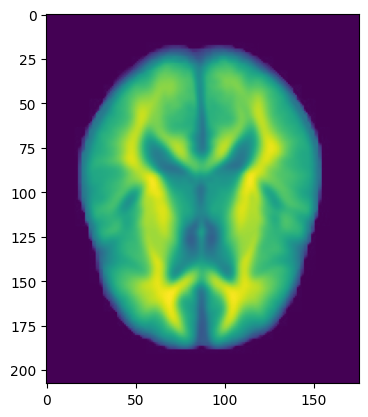

In [8]:
scaled_dataset_mean = np.mean(scaled_dataset, axis=0)  # mean of all images (column-wise)

# Let's visualize the mean image
plt.imshow(scaled_dataset_mean.reshape(208, 176))

In [9]:
# Let's show that there really is a difference
overall_min = float('inf')
overall_max = -float('inf')

for image in scaled_dataset:
    max_of_image = image.max()
    min_of_image = image.min()
    overall_max = max_of_image if max_of_image > overall_max else overall_max
    overall_min = min_of_image if min_of_image < overall_min else overall_min

print("Overall min:", overall_min)
print("Overall max:", overall_max)

Overall min: 0.0
Overall max: 1.0


In [10]:
# THIS IS THE WAY I DID IT ON HW... DID NOT DIVIDE BY 255
hw_matrix = np.subtract(dataset, dataset_mean)  # this takes care of zero-ing mean
stdev = np.std(hw_matrix, axis=1)
hw_matrix = (hw_matrix.T / stdev).T

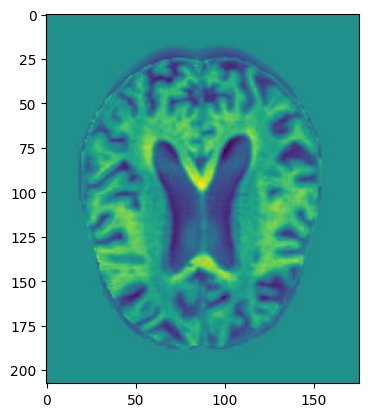

In [11]:
plt.imshow(hw_matrix[0].reshape(208, 176))

In [12]:
hw_matrix.shape

(6400, 36608)

In [14]:
hw_pca_all = PCA(n_components = 0.99)
hw_pca_all.fit(hw_matrix)

PCA(n_components=0.99)

In [15]:
hw_eigenvalues = hw_pca_all.explained_variance_
len(hw_eigenvalues)

1877

In [16]:
# Displaying first 100 eigenvectors

prev = float(hw_eigenvalues[0])
for i in range(len(hw_eigenvalues)):
    if hw_eigenvalues[i] > prev:
        print("OUT OF ORDER")
    prev = hw_eigenvalues[i]

In [17]:
dataset[0].shape

(36608,)

In [18]:
hw_pca_all.components_[0].T.shape

(36608,)

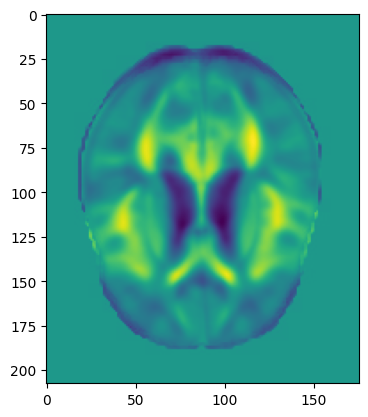

In [19]:
plt.imshow(hw_pca_all.components_[0].T.reshape(208, 176))

In [ ]:
print("Our dataset has dimension", dataset.shape)
pca_90 = PCA(n_components = 0.9)
pca_90.fit(dataset)
eigenvalues = pca_90.explained_variance_
len(eigenvalues)

In [ ]:
plt.imshow(pca_90.mean_.reshape(208, 176))

In [ ]:
plt.imshow(pca_90.components_[0].reshape(208, 176))

In [ ]:
plt.imshow(pca_90.components_[1].reshape(208, 176))

In [ ]:
%%time
import time
time.sleep(3)

In [ ]:
# Here are the first 100 eigenvectors


# USE PICKLE SO THAT WE DO NOT NEED RUN PCA EVERY TIME

In [21]:
import pickle as pk
path_to_pickle = '../../../pickles/PCA/pca_all.pkl'
with open(path_to_pickle, "wb") as pickle_file:
    pk.dump(hw_pca_all, pickle_file)